In [ ]:
# Overlay the raw plot on top of the decoded plot

In [12]:
import pandas as pd
import glob as glob

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean
from statistics import stdev

In [3]:
ls

Casey_Greene_baseline.ipynb
Classical ML on raw vs decoded notes.rtf
RF_BRCA_r0/
baseline_00.ipynb
baseline_01.ipynb
baseline_02.ipynb
baseline_03.ipynb
baseline_04.ipynb
data/
decoded/
decoded_baseline_F1s/
decoded_baseline_plots/
matrices_build.ipynb
overlay.ipynb
raw_baseline_F1s/
raw_baseline_plots/


In [4]:
ls decoded_baseline_F1s/

5k_r0.tsv


In [17]:
dec = pd.read_csv('decoded_baseline_F1s/5k_r0.tsv', sep = '\t', index_col = 0)

In [6]:
ls raw_baseline_F1s/

5k_r0.tsv         blnk_frm_r0.tsv   blnk_frm_tst.tsv


In [9]:
raw = pd.read_csv('raw_baseline_F1s/5k_r0.tsv', sep = '\t', index_col = 0)

In [ ]:
# blank frame read is now raw

In [14]:
idx_pos

24

raw done


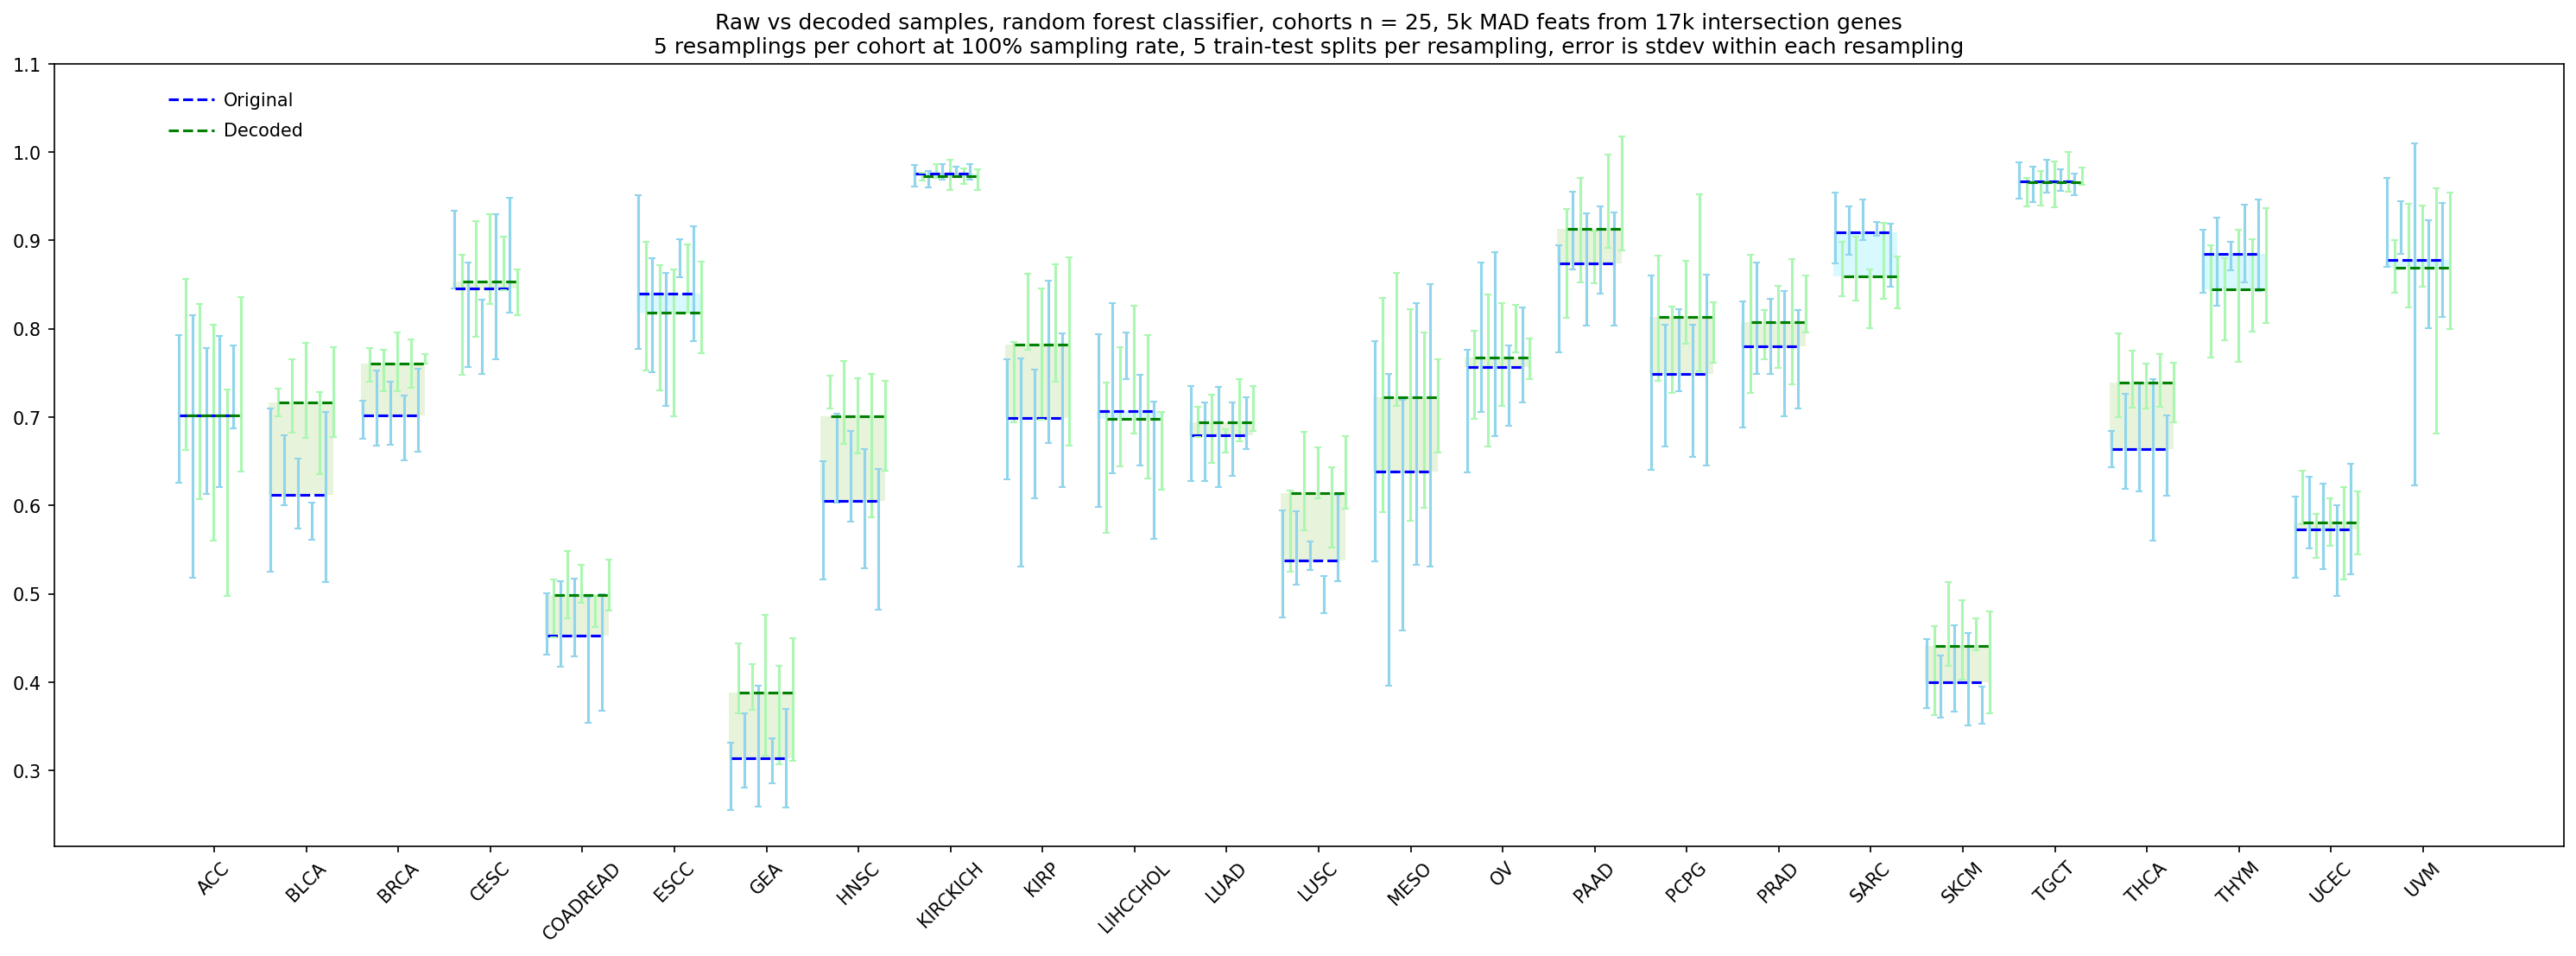

In [93]:
# Raw and decoded overlay plot
plt_v=12 # ten was original raw, 11 was original decoded

re_samp = 5
trn_tst_splts = 5

figure(figsize=(len(raw.index), 8), dpi=150)
# plt.scatter(.01, .99, color = 'white')

x_tck_lst = [] # only need once, done in raw section
cohort_list = [] # only need once, done in raw section

# Raw start
original_ave_means = []
for idx_pos, idx in enumerate(raw.index):

    x = idx_pos-.04
    raw_ave_mean = [] # for raw, need for deco
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            raw.loc[idx, 'mean'+str(rs)],
            yerr=raw.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#90D5EC')
        raw_ave_mean.append(raw.loc[idx, 'mean'+str(rs)])
    original_ave_means.append(mean(raw_ave_mean))
    x_points = [x-.5-.09, x]
    y_points = [mean(raw_ave_mean), mean(raw_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'blue') # blue is raw
# Raw end   
    
    x_tck_lst.append(idx_pos+.5) # only need once, send to end
    cohort_list.append(idx.split('_')[0]) # only need once, send to end
print('raw done')


for idx_pos, idx in enumerate(dec.index): # decoded is green

    x = idx_pos+.04
    dec_ave_mean = []
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            dec.loc[idx, 'mean'+str(rs)],
            yerr=dec.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#abf7b1')
        dec_ave_mean.append(dec.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5-.09, x]
    y_points = [mean(dec_ave_mean), mean(dec_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'green') # decoded
    
    if original_ave_means[idx_pos] > mean(dec_ave_mean):
        plt.bar(x, height = original_ave_means[idx_pos]-mean(dec_ave_mean),
                width = -.7,
                bottom = mean(dec_ave_mean),
                align = 'edge', color = '#d8f9ff')
        

    if original_ave_means[idx_pos] < mean(dec_ave_mean):
        plt.bar(x, height = original_ave_means[idx_pos]-mean(dec_ave_mean),
                width = -.7,
                bottom = mean(dec_ave_mean),
                align = 'edge', color = '#e8f3db')
    # break
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45) 
plt.title('Raw vs decoded samples, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes\n'+
         '5 resamplings per cohort at 100% sampling rate, 5 train-test splits per resampling, error is stdev within each resampling')

legend_x, legend_y = -.0, 1.06
y_off = .035

plt.plot((legend_x, leg_x+.5), (legend_y, legend_y), linestyle='dashed', color = 'blue') # original
plt.plot((legend_x, leg_x+.5), (legend_y-y_off, legend_y-y_off), linestyle='dashed', color = 'green') # decoded

center = .007
plt.annotate('Original', (legend_x+.6,legend_y-center))          # blue
plt.annotate('Decoded', (legend_x+.6,legend_y-y_off-center)) # green

plt.savefig('overlay_plots/overlay_'+str(plt_v)+'.png', dpi = 150)

In [ ]:
#e8f3db super light green

In [92]:
#d8f9ff

In [80]:
raw_ave_mean

[0.9202627450980392,
 0.9147748855144198,
 0.8163982683982685,
 0.8613941228989822,
 0.8778182601712012]

In [78]:
mean(raw_ave_mean)

0.8781296564161821

In [ ]:
# Devel / inspections

In [38]:
raw.head(1)

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
ACC_RandomForestClassifier(max_depth=2),0.709027,0.08377,0.666418,0.148746,0.695419,0.082441,0.706466,0.085337,0.734277,0.047009


In [24]:
[h for h in dec.columns if h.startswith('m')]

['mean0', 'mean1', 'mean2', 'mean3', 'mean4']

In [34]:
mean(dec.loc['ACC_decoded_r0_RandomForestClassifier(max_depth=2)', ['mean0', 'mean1', 'mean2', 'mean3', 'mean4']])

0.702152977426484

In [35]:
mean(raw.loc['ACC_RandomForestClassifier(max_depth=2)', ['mean0', 'mean1', 'mean2', 'mean3', 'mean4']])

0.7023215477409575

In [37]:
dec.head(1)

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
ACC_decoded_r0_RandomForestClassifier(max_depth=2),0.759594,0.09647,0.717528,0.11079,0.682559,0.122454,0.614152,0.116637,0.736932,0.098524


In [ ]:
#abf7b1 lighter green

In [ ]:
#83f28f lighter green

In [ ]:
#39e75f light green

In [ ]:
#90D5EC bright blue grey

In [ ]:
#90a3b0 light blue grey

In [ ]:
#adbea9 light green grey

In [ ]:
#cbcbcb

In [ ]:
# light grey
#d3d3d3

In [ ]:
# dark grey
#a9a9a9